# **SVM-MULTICLASS**

**Support vector machines (SVMs)** were originally designed for **binary classification**. How to effectively extend it for multiclass classification is still an ongoing research issue.

Several methods have been proposed where typically we construct a multiclass classifier by **combining** several binary classifiers. Some authors also proposed methods that consider **all classes at once**. For methods solving
multiclass SVM in one step, a much larger optimization problem is required so up to now experiments are limited to small data sets.

## **One-against-all**

The earliest used implementation for **SVM multiclass classification**
is probably the **one-against-all method** (1994). It constructs $k$ SVM models where $k$ is the number of classes.

The $i$th SVM is trained with all of the examples in the $i$th class with positive labels, and all other examples with negative labels.

Thus given $l$ training data $(\textbf{x}_1, y_1), \ldots, (\textbf{x}_l, y_l)$, where $\textbf{x}_t\in \mathbb{R}^n, \ t=1,\ldots, l$ and $y_t\in\{1,\ldots,k\}$ is the class of $\textbf{x}_t$, the $i$th SVM solves the following problem:

\begin{eqnarray}
  \min_{\textbf{w}^i, b^i, \xi^i}  \frac{1}{2}( \textbf{w}^i)^T\textbf{w}^i + C \sum_{t=1}^l \xi_t^i  & & &\\
  \text{s.t.} \quad ( \textbf{w}^i)^T \textbf{x}_t + b^i &\geq& 1- \xi^i_t, & \ \text{if } y_t = i\\
  \text{s.t.} \quad ( \textbf{w}^i)^T \textbf{x}_t + b^i &\leq& -1+ \xi^i_t, & \ \text{if } y_t \neq i\\
  \xi_t^i & \geq & 0, & t=1,\ldots,l
\end{eqnarray}
where $C$ is the penalty parameter.

Minimizing $\frac{1}{2}( \textbf{w}^i)^T\textbf{w}^i$ means that we would like **to maximize** $\frac{2}{\|\textbf{w}^i\|}$, **the margin** between two groups of data. When data are not linear separable, there is a **penalty** term which can reduce the number of training errors.

The basic concept behind SVM is to search for a **balance** between the **regularization term** and the **training errors**.

After solving the last model, there are $k$ decision functions
\begin{eqnarray}
  (\textbf{w}^1)^T \textbf{x} & +& b^1\\
  (\textbf{w}^2)^T \textbf{x} & +& b^2\\
  &\vdots&\\
  (\textbf{w}^k)^T \textbf{x} &+& b^k\\
\end{eqnarray}

We say $\textbf{x}$ is in the class which has the largest value of the decision function

$$\text{class of } \textbf{x} \equiv \arg \max_{i=1,\ldots,k} \left((\textbf{w}^i)^T \textbf{x} + b^i\right)$$

## **One-against-one**

Another major method is called the **one-against-one method** (1996). This method constructs $\frac{k(k-1)}{2}$ classifiers where each one is **trained on data from two classes**.

For training data from the $i$th and the $j$th classes, we solve the following
binary classification problem:

\


\begin{eqnarray}
  \min_{\textbf{w}^{i,j}, b^{i,j}, \xi^{i,j}}  \frac{1}{2}( \textbf{w}^{i,j})^T\textbf{w}^{i,j} + C \sum_{t=1\\ t\in\{i,j\}}^l \xi_t^{i,j} & & &\\
  \text{s.t.} \quad ( \textbf{w}^{i,j})^T \textbf{x}_t + b^{i,j} &\geq& 1- \xi^{i,j}_t, & \ \text{if } y_t = i\\
  \text{s.t.} \quad ( \textbf{w}^{i,j})^T \textbf{x}_t + b^{i,j} &\leq& -1+ \xi^{i,j}_t, & \ \text{if } y_t = j\\
  \xi_t^{i,j} & \geq & 0, & t=1,\ldots,l, \ t\in\{i,j\}
\end{eqnarray}

There are different methods for doing the future testing after all $\frac{k(k-1)}{2}$ classifiers are constructed.

> For instance: if
$$\text{sign}\left( (\textbf{w}^{i,j})^T \textbf{x} + b^{i,j} \right)$$
says $\textbf{x}$ is in the th class, then the vote for the $i$th class is added by one. Otherwise, the $j$th is increased by one. Then we predict is in the class with the **largest vote**. The
voting approach described above is also called the ***MaxWins*
strategy**. In case that two classes have identical votes, thought it
may not be a good strategy, now we simply select the one with
the smaller index.

## **DAGSVM**

The third algorithm is the **directed acyclic graph SVM** or **DAGSVM** (2000). Its training phase is the same as the **one-against-one method** by solving $\frac{k(k-1)}{2}$ binary SVMs.

However, in the testing phase, it uses a **rooted binary
directed acyclic graph** which has $\frac{k(k-1)}{2}$ internal nodes
and leaves.

Each node is a binary SVM of $i$th and $j$th classes. Given a test sample $\textbf{x}$, starting at the root node, the binary decision
function is evaluated. Then it moves to either left or right
depending on the output value. Therefore, we go through a path
before reaching a leaf node which indicates the predicted class.

## **All-Together**

The **all-together approach** (1999) assumes first that the $k$ class of points are piecewise-linearly separable, i.e., there exist $\textbf{w}^i \in \mathbb{R}^n$ and $b^i\in \mathbb{R}$, $i=1,\ldots,k$ such that
$$(\textbf{w}^i)^T \textbf{x}_t +b^i > (\textbf{w}^j)^T \textbf{x}_t +b^j, \qquad i,j=1,\ldots, k, \ i\neq j, \ \forall \textbf{x}_t \in \omega_i$$

The class of a point $\textbf{x}$ is determined from $(\textbf{w}^i, b^i)$, $i=1,\ldots, k$, by finding $i$ such that

$$f_i(\textbf{x}) = (\textbf{w}^i)^T \textbf{x}_t +b^i $$
is maximized.

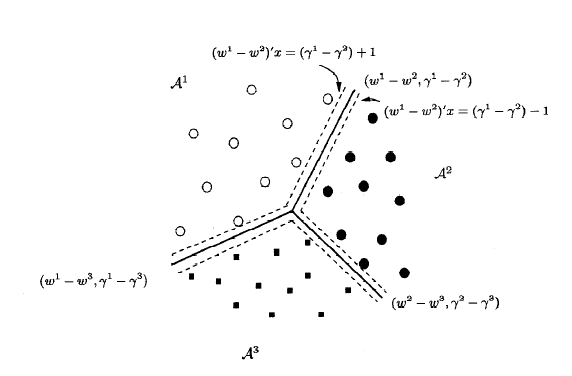

For this piecewise-linearly separable problem, infinitely many $(\textbf{w}^i, b^i)$ exist that satisfy first inequality. Intuitively, the ***optimal*** $(\textbf{w}^i, b^i)$ provides the **largest margin** of classification. So in
an approach analogous to the two-class support vector machine (SVM) approach, we add regularization terms.

The margin of separation between the classes $i$ and $j$, i.e., the distance between the supporting hyperplanes of the halfspaces
$$(\textbf{w}^i - \textbf{w}^j)^T \textbf{x} +(b^i -b^j) \geq 1, \qquad \textbf{x}\in \omega_i$$
$$(\textbf{w}^j - \textbf{w}^i)^T \textbf{x} +(b^j -b^i) \leq -1, \qquad \textbf{x}\in \omega_j$$

is $\frac{2}{\|\textbf{w}^i - \textbf{w}^j\|}$.

So we would like to minimize $\|\textbf{w}^i - \textbf{w}^j\|$ for all $i,j=1,\ldots,k, \ i\neq j$.

Also we will add the regularization term
$$\frac{1}{2}\sum_{i=1}^k \| \textbf{w}^i \|^2$$
to the objective.

For the piecewise-linearly separable problem we get the following
\begin{eqnarray}
\min_{\textbf{w}^i, b^i} \frac{1}{2}\sum_{i=1}^k\sum_{j=1\\ j\neq i}^{k} \| \textbf{w}^i-\textbf{w}^j\|^2+\frac{1}{2}\sum_{i=1}^k \| \textbf{w}^i \|^2& &\\
\text{s.t.} \left(\textbf{w}^i-\textbf{w}^j \right)^T\textbf{x}_t + (b^i-b^j) &\geq& 1 \qquad i,j=1,\ldots, k, \ i\neq j, \ \textbf{x}_t\in \omega_i
\end{eqnarray}

## **References**


- Hsu, C.W. & Lin, C.J. (2002) *A comparison of methods for multiclass support vector machines*, in **IEEE Transactions on neural Networks**, 13(2): 415-425.

- Bredensteiner, E.J. & Bennett, K.P. (1999) *Multicategory classification by support vector machines*, in **Computational Optimization and  Applications, 12: 53-79.